# Declaration of Originality

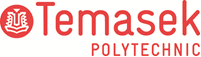

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :  Mikeal Leow (2400024B)
* Tutorial Group                :  P06
* Tutor						    :  Emile SABASTIAN
* Submission Date               :  14 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd

# 1. Business Understanding
Goal: Missed hospital appointments lead to wasted medical resources, longer patient waiting times, and increased operational costs.  
The goal of this project is to develop a supervised machine learning model that predicts whether a patient is likely to **not show up** for a scheduled hospital appointment.

By identifying high-risk no-show appointments in advance, hospitals can:
- Send targeted reminders
- Adjust scheduling or overbooking strategies
- Improve resource utilisation and patient care efficiency

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("../data/hospital_no_show_appointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 2.2 Summary Statistics

To better understand the dataset structure, the data types of each variable were examined.
This helps identify numerical, categorical, and date-related features and guides subsequent preprocessing steps.

Key observations:

The dataset contains a mix of numerical, categorical, and date-related variables.

Age is a numerical variable representing patient age.

Medical condition indicators such as hypertension, diabetes, alcoholism, scholarship, and SMS_received are binary numerical variables (0 or 1).

Gender, neighbourhood, and appointment attendance (No-show) are categorical variables.

ScheduledDay and AppointmentDay are stored as object types and will be converted to datetime format during preprocessing.

No missing values were detected across all variables.

In [3]:
## Understand the type of variable for each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
## Check for missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# Standardise column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('-', '_')
    .str.replace(' ', '_')
)

df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

### Describe Data Distribution

To gain an overall understanding of the dataset, descriptive statistics were generated for numerical variables.  
This provides insights into the central tendency, spread, and potential anomalies such as unusually high or low values.


In [ ]:
## Describe data distribution
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Observation on Descriptive Statistics

The descriptive statistics output includes `patientid` and `appointmentid`, which are identifier columns.
These columns do not represent meaningful numerical features and may distort statistical interpretation.

Therefore, they will be excluded from subsequent descriptive analysis and modelling steps.


In [ ]:
## Describe data distribution (excluding identifier columns)
df.drop(columns=['patientid', 'appointmentid']).describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Observation: Invalid Age Values

From the descriptive statistics above, the minimum value for **age** is **-1**, which is not a valid age.

This indicates the presence of invalid or placeholder values in the dataset. Such values can negatively impact data analysis and model performance if left untreated.


In [ ]:
# Check number of invalid age values
df[df['age'] < 0].shape[0]

# View sample rows with invalid age
df[df['age'] < 0].head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Handling Invalid Age Values

Negative age values are not meaningful in a real-world medical context and likely represent data entry errors or placeholders.

As the number of such records is relatively small compared to the overall dataset size, these rows will be **removed** to preserve data quality and avoid introducing bias through imputation.


In [26]:
# Remove records with invalid age values
df = df[df['age'] >= 0]

# Verify that invalid age values are removed
df['age'].min()

0

In [27]:
# Re-describe data distribution (excluding identifier columns)
df.drop(columns=['patientid', 'appointmentid']).describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data
The target variable no_show indicates whether a patient failed to attend a scheduled hospital appointment.

Understanding the distribution of the target variable is important to identify potential class imbalance, which can influence model performance and metric selection.

A visual inspection of the class distribution helps determine whether special techniques such as resampling or alternative evaluation metrics are required.

### 2.3.1.1 Understanding distribution of target

In [16]:
## Distribution of target variable (no_show)
df['no_show'].value_counts()


no_show
No     88208
Yes    22319
Name: count, dtype: int64

### 2.3.1.2 Understanding distribution of features

In [ ]:
# Distribution of age
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

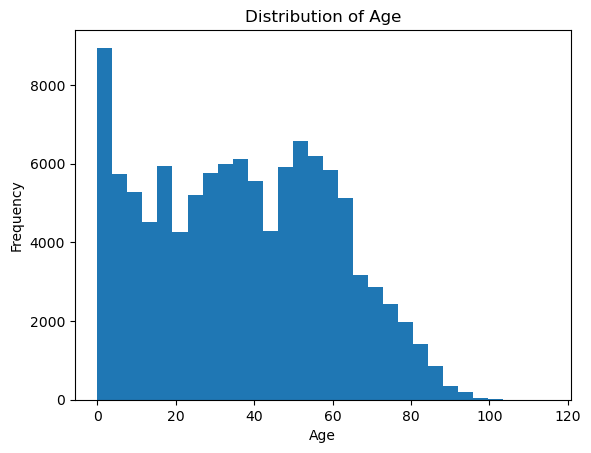

In [29]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Observation (Age Feature):
The age distribution is right-skewed, with most patients concentrated between approximately 20 and 60 years old.

A small number of elderly patients (above 80 years) are present, which is expected in a hospital setting.

After removing invalid negative age values, no further anomalies were detected. Therefore, the age feature will be retained without additional transformation.

### Distribution of Binary Features

Several features in the dataset are binary indicators representing patient conditions or appointment-related factors.  
Understanding their distributions helps identify sparsity, imbalance, and potential predictive usefulness.


In [31]:
# Distribution of binary features
binary_features = [
    'scholarship',
    'hipertension',   # note: dataset spelling
    'diabetes',
    'alcoholism',
    'handcap',
    'sms_received'
]

for col in binary_features:
    print(f"\n{col.upper()}")
    print(df[col].value_counts())



SCHOLARSHIP
scholarship
0    99665
1    10861
Name: count, dtype: int64

HIPERTENSION
hipertension
0    88725
1    21801
Name: count, dtype: int64

DIABETES
diabetes
0    102583
1      7943
Name: count, dtype: int64

ALCOHOLISM
alcoholism
0    107166
1      3360
Name: count, dtype: int64

HANDCAP
handcap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

SMS_RECEIVED
sms_received
0    75044
1    35482
Name: count, dtype: int64


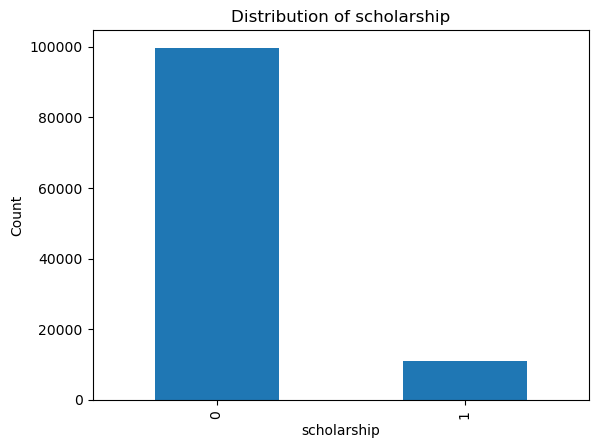

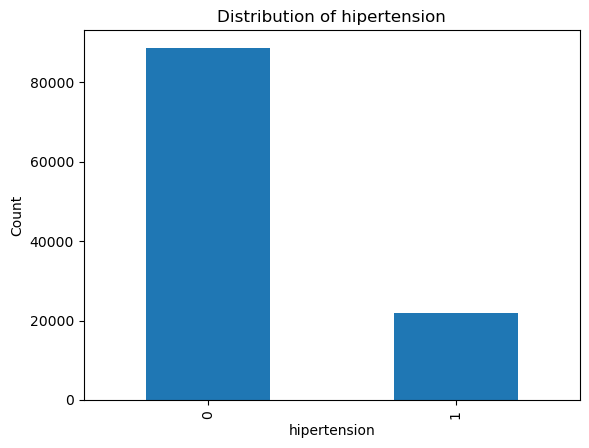

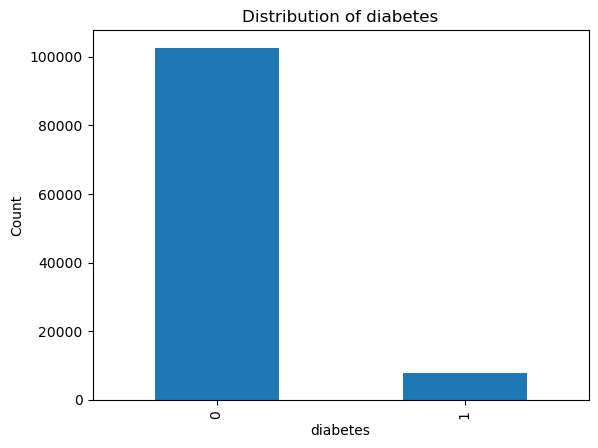

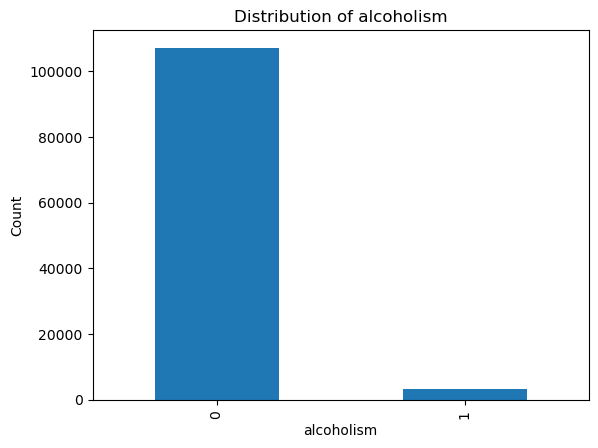

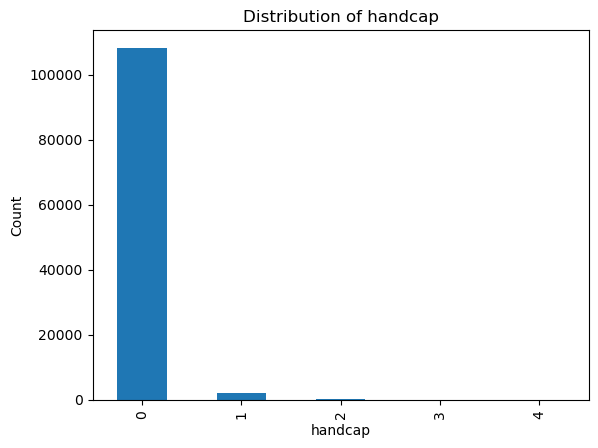

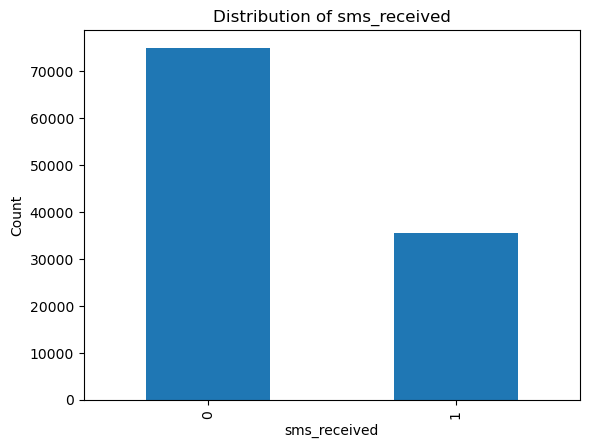

In [32]:
import matplotlib.pyplot as plt

for col in binary_features:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


**Observation (Binary Features):**

Most binary features such as hypertension, diabetes, alcoholism, and handicap are heavily imbalanced, with the majority of patients having a value of 0.  
This indicates that these medical conditions are relatively less common in the dataset.

The `sms_received` feature shows a more balanced distribution compared to medical conditions, suggesting that reminder messages were sent to a significant portion of patients.

Although some features are imbalanced, they are retained as they may still provide meaningful signals for predicting appointment no-shows.


### 2.3.2 Understanding relationship between variables

In [9]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
## Clean data

## 3.2 Train-Test Split

In [11]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [12]:
## Initialise and train model


# 5. Model Evaluation

In [13]:
## Evaluate model


In [14]:
## New data

## Predict


## Iterative model development


In [15]:
## Further feature engineering / feature selection